In [1]:
import requests as req
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
now = int(datetime.datetime.now().timestamp())

yesterday = int(datetime.datetime.now().timestamp()) - 86400

week_ago = int(datetime.datetime.now().timestamp()) - 608400

def hit_api_one_day(coin):
    return req.get('https://api.coingecko.com/api/v3/coins/' + coin + '/market_chart/range?vs_currency=usd&from=' + str(yesterday) + '&to=' + str(now))

In [3]:
harm = hit_api_one_day('harmony')
zil = hit_api_one_day('zilliqa')
vechain = hit_api_one_day('vechain')

In [4]:
def hit_api_week_ago(coin):
    return req.get('https://api.coingecko.com/api/v3/coins/' + coin + '/market_chart/range?vs_currency=usd&from=' + str(week_ago) + '&to=' + str(now))

In [5]:
def convert_json(resp):
    return json.loads(resp.text)

In [6]:
hone = convert_json(harm)
zill = convert_json(zil)
vet = convert_json(vechain)

In [7]:
def add_dt(json):
    data = []

    for i in json['prices']:

        temp = [datetime.datetime.fromtimestamp(int(i[0]/1000)), i[1]]

        data.append(temp)

    return data

In [8]:
one = add_dt(hone)
zilliqa = add_dt(zill)
vech = add_dt(vet)

In [9]:
def make_df(data):
    total_df = pd.DataFrame(data, columns=['date', 'price'])

    total_df['MA12'] = total_df['price'].rolling(12).mean()

    total_df = total_df.set_index('date')

    return total_df

one_df = make_df(one)
zil_df = make_df(zilliqa)
vet_df = make_df(vech)

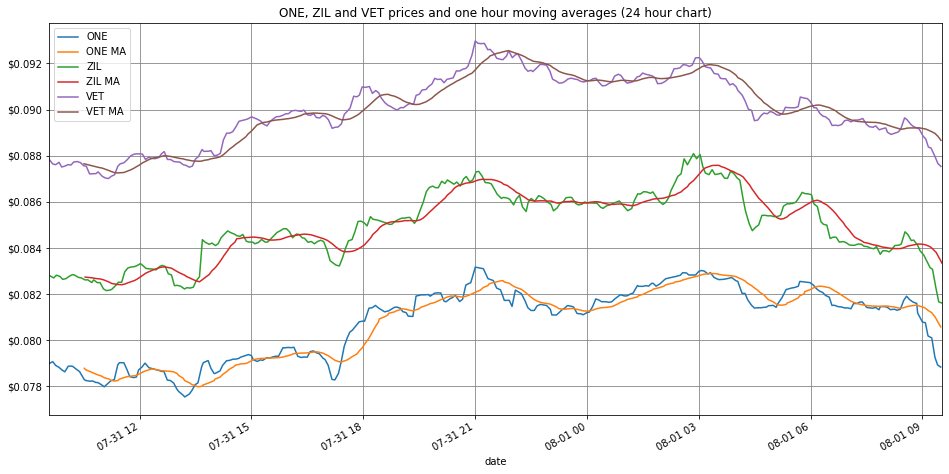

In [10]:
ax = plt.axes()
one_df['price'].plot(label='ONE', figsize=[16,8], title="ONE, ZIL and VET prices and one hour moving averages (24 hour chart)")
one_df['MA12'].plot(label='ONE MA')
zil_df['price'].plot(label='ZIL')
zil_df['MA12'].plot(label='ZIL MA')
vet_df['price'].plot(label='VET')
vet_df['MA12'].plot(label='VET MA')
fmt = '${x:,.3f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.legend()
plt.grid(True, color='gray')
plt.savefig('OneZilVet24hr.png')

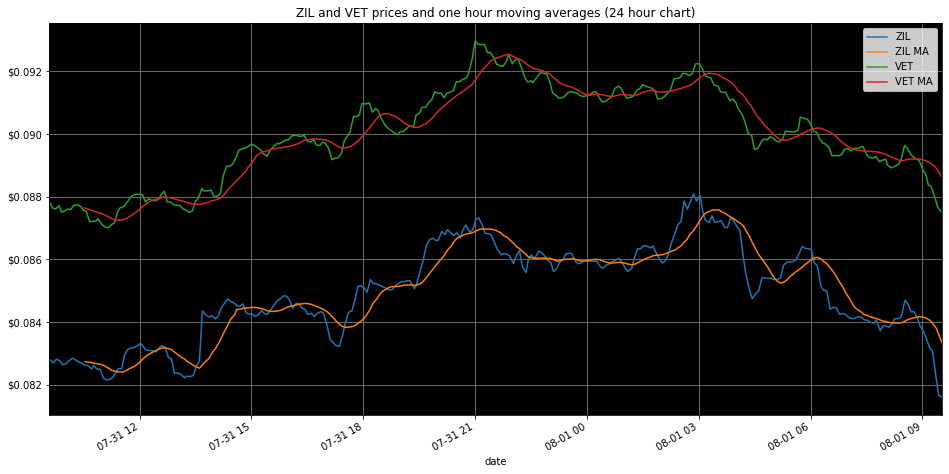

In [11]:
ax = plt.axes()
ax.set_facecolor("black")

zil_df['price'].plot(label='ZIL', figsize=[16,8], title = 'ZIL and VET prices and one hour moving averages (24 hour chart)')
zil_df['MA12'].plot(label='ZIL MA')
vet_df['price'].plot(label='VET')
vet_df['MA12'].plot(label='VET MA')
fmt = '${x:,.3f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.legend()
plt.grid(True, color='gray')
plt.savefig('ZilVet24hr.png')

In [12]:
zilw = hit_api_week_ago('zilliqa')
vechainw = hit_api_week_ago('vechain')

In [13]:
zillw = convert_json(zilw)
vetw = convert_json(vechainw)

In [14]:
zilliqaw = add_dt(zillw)
vechw = add_dt(vetw)

In [15]:
def make_dfw(data):
    total_df = pd.DataFrame(data, columns=['date', 'price'])

    total_df['MA4'] = total_df['price'].rolling(4).mean()
    
    total_df['MA24'] = total_df['price'].rolling(24).mean()

    total_df = total_df.set_index('date')

    return total_df

In [16]:
zilw_df = make_dfw(zilliqaw)
vetw_df = make_dfw(vechw)

In [17]:
zilw_df

,price,MA4,MA24
date,,,
2021-07-25 09:01:47,0.072062,NaN,NaN
2021-07-25 10:03:58,0.072224,NaN,NaN
2021-07-25 11:03:20,0.072469,NaN,NaN
2021-07-25 12:01:23,0.074526,0.072820,NaN
2021-07-25 13:03:13,0.074499,0.073430,NaN
...,...,...,...
2021-08-01 05:02:26,0.085359,0.086584,0.084563
2021-08-01 06:02:22,0.086308,0.086689,0.084849
2021-08-01 07:01:30,0.084241,0.085737,0.084934


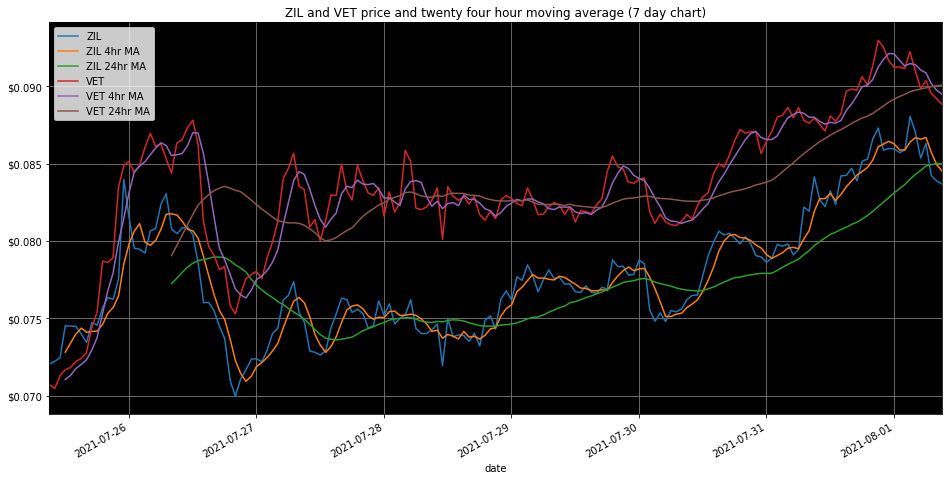

In [18]:
ax = plt.axes()
ax.set_facecolor("black")

zilw_df['price'].plot(label='ZIL', figsize=[16,8], title = 'ZIL and VET price and twenty four hour moving average (7 day chart)')
zilw_df['MA4'].plot(label='ZIL 4hr MA')
zilw_df['MA24'].plot(label='ZIL 24hr MA')
vetw_df['price'].plot(label='VET')
vetw_df['MA4'].plot(label='VET 4hr MA')
vetw_df['MA24'].plot(label='VET 24hr MA')
fmt = '${x:,.3f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.legend()
plt.grid(True, color='gray')
plt.savefig('ZilVet7day.png')

In [19]:
zil_low = zilw_df.price.min()
zil_high = zilw_df.price.max()
zil_diff = zil_high - zil_low
zil_fib1 = zil_high - 0.236 * zil_diff
zil_fib2 = zil_high - 0.382 * zil_diff
zil_fib3 = zil_high - 0.618 * zil_diff

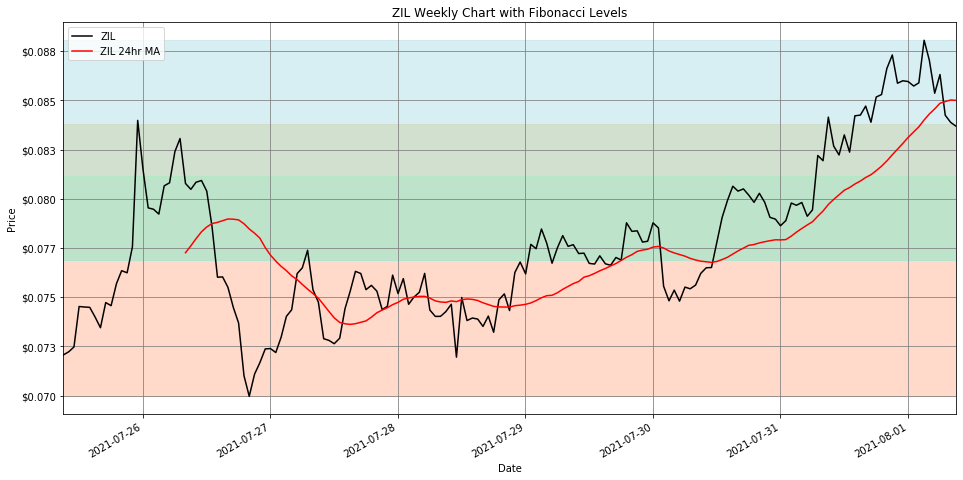

In [20]:
fig, ax = plt.subplots()

ax.axhspan(zil_fib1, zil_low, alpha=0.4, color='lightsalmon')
ax.axhspan(zil_fib2, zil_fib1, alpha=0.5, color='palegoldenrod')
ax.axhspan(zil_fib3, zil_fib2, alpha=0.5, color='palegreen')
ax.axhspan(zil_high, zil_fib3, alpha=0.5, color='powderblue')

zilw_df['price'].plot(label='ZIL', figsize=[16,8], title = 'ZIL Weekly Chart with Fibonacci Levels', color='black')
zilw_df['MA24'].plot(label='ZIL 24hr MA', color='red')

plt.ylabel("Price")
plt.xlabel("Date")
fmt = '${x:,.3f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.grid(True, color='gray')
plt.legend(loc=2)
plt.show()

In [21]:
vet_low = vetw_df.price.min()
vet_high = vetw_df.price.max()
vet_diff = vet_high - vet_low
vet_fib1 = vet_high - 0.236 * vet_diff
vet_fib2 = vet_high - 0.382 * vet_diff
vet_fib3 = zil_high - 0.618 * vet_diff

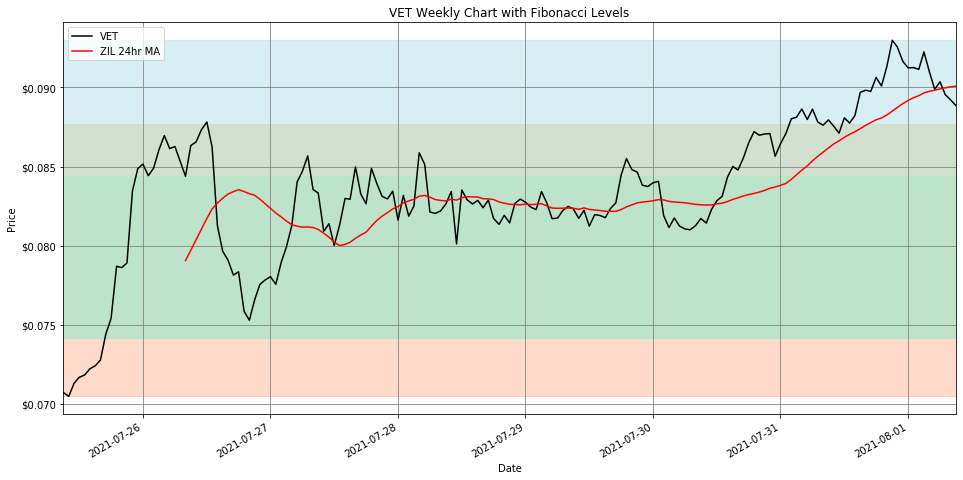

In [22]:
fig, ax = plt.subplots()

ax.axhspan(vet_fib1, vet_low, alpha=0.4, color='lightsalmon')
ax.axhspan(vet_fib2, vet_fib1, alpha=0.5, color='palegoldenrod')
ax.axhspan(vet_fib3, vet_fib2, alpha=0.5, color='palegreen')
ax.axhspan(vet_high, vet_fib3, alpha=0.5, color='powderblue')

vetw_df['price'].plot(label='VET', figsize=[16,8], title = 'VET Weekly Chart with Fibonacci Levels', color='black')
vetw_df['MA24'].plot(label='ZIL 24hr MA', color='red')

plt.ylabel("Price")
plt.xlabel("Date")
fmt = '${x:,.3f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.grid(True, color='gray')
plt.legend(loc=2)
plt.show()